In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def y_center(b1):
    upper = (25 *25 * 25/2) + (b1 * 15 * 32.5) + (25 * 10) * 45
    lower = 625 + (15 * b1) + 250
    return upper/lower

In [3]:
def Ixx(b1): 
    res = (1/12 * 25 * 50 **3) - 2*(1/12 * (25-b1)/2 * 15**3 + (25-b1)/2 * 15 * (32.5 - y_center(b1))**2)
    return res

In [4]:
def Q1(b1):
    res = (25*25) * np.abs(25/2 - y_center(b1))
    return res

def Q2(b1):
    res = (10*25) * np.abs(25 - y_center(b1))
    return res

In [5]:
V = 1000
def tau(b1, Q):
    res = V * Q * 10**-9 / (Ixx(b1)* 10**-12 * b1 * 10**-3)
    return res

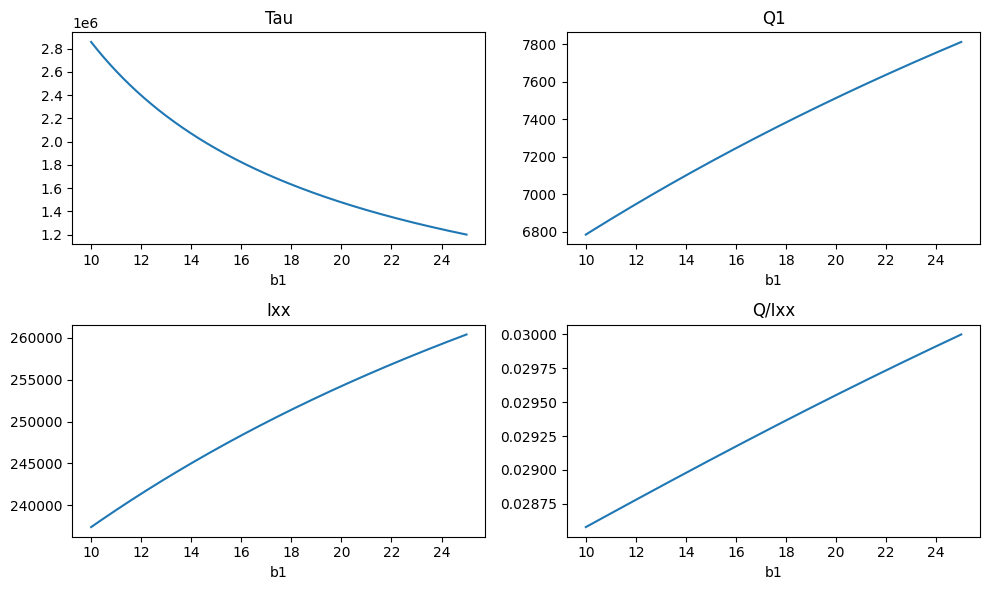

In [8]:
b1 = np.linspace(25, 10, 1000)
x = tau(b1, Q1(b1))
fig, axs = plt.subplots(2,2, figsize=(10,6))
axs[0, 0].plot(b1, tau(b1, Q1(b1)))
axs[0, 0].set_title('Tau')
axs[0, 0].set_yticks(np.arange(min(x), max(x)+1, 1E05 *2))
axs[0, 1].plot(b1, Q1(b1))
axs[0, 1].set_title('Q1')
axs[1, 0].plot(b1, Ixx(b1))
axs[1, 0].set_title('Ixx')
axs[1, 1].plot(b1, Q1(b1)/Ixx(b1))
axs[1, 1].set_title('Q/Ixx')
# plt.plot(b1, tau(b1))

for ax in axs.flat:
    ax.set(xlabel='b1')
plt.tight_layout()
plt.show()

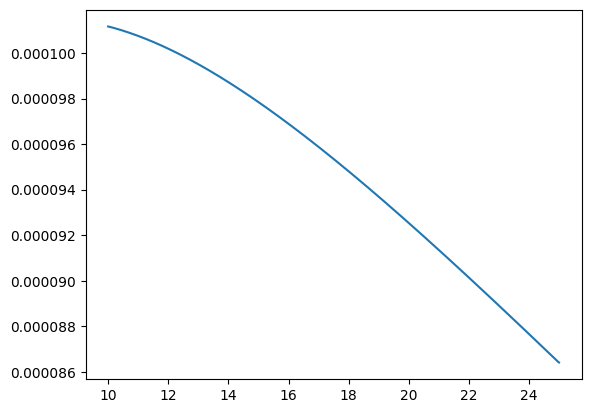

In [12]:
grad = x = np.gradient((Q1(b1)/Ixx(b1)), (b1[1] - b1[0]))
plt.plot(b1, grad)